# Programa de Pós-graduação em Computação Aplicada – PPCA (UnB)

Tarefa 3 de AEDI - (01/12/2024)

Nome: Giovanna Luiza Vales Correa

Matrícula: 242105852

### Questão

#### Você é um analista de dados imobiliários de uma empresa de consultoria especializada no mercado imobiliário. Esta empresa pede que você adquira os dados de um conjunto de propriedades de Ames, Iowa. Levando em consideração as características das propriedades (como o número de quartos, presença de garagem, lareira, piscina, entre outros), você deve desenvolver a seguinte análise estatística usando ANOVA:

#### a) Comparação de Preços entre Características:

Obtenção e Importação dos Dados

In [4]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\giova\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import kagglehub

# Download da versão mais recente
path = kagglehub.dataset_download("prevek18/ames-housing-dataset")


In [8]:
import os
import shutil

# Caminho atual do dataset após o download
current_dir = path

# Novo caminho onde você quer mover os arquivos
new_dir = "datasets"

# Cria o novo diretório, se não existir
os.makedirs(new_dir, exist_ok=True)

# Move os arquivos para o novo diretório
for file_name in os.listdir(current_dir):
    full_file_path = os.path.join(current_dir, file_name)
    if os.path.isfile(full_file_path):
        shutil.move(full_file_path, new_dir)

print(f"Arquivos movidos para: {new_dir}")

Arquivos movidos para: datasets


Carregamento dos dados

In [10]:
import os
import pandas as pd

# Localiza o arquivo CSV principal
csv_file = os.path.join(new_dir, "AmesHousing.csv")

# Carrega o arquivo diretamente no Pandas
df = pd.read_csv(csv_file)

# Visualiza os primeiros registros do dataset
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [14]:
# Verificar as colunas disponíveis
print(df.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

Análise explortória das características escolhidas: 
- Full Bath (banheiro completo)
- Garage Type (tipo de garagem)
- Neighborhood (bairro)
- Fireplaces (quantidade de lareira)
- Pool QC (qualidade da pscina)

In [22]:
# Explorar as variáveis específicas
print(df['Full Bath'].value_counts())    # Ano de construção
print(df['Garage Type'].value_counts())    # Tipo de garagem
print(df['Fireplaces'].value_counts())    # Lareira
print(df['Pool QC'].value_counts())        # Qualidade da piscina
print(df['Neighborhood'].value_counts())  # Bairro

Full Bath
2    1532
1    1318
3      64
0      12
4       4
Name: count, dtype: int64
Garage Type
Attchd     1731
Detchd      782
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64
Fireplaces
0    1422
1    1274
2     221
3      12
4       1
Name: count, dtype: int64
Pool QC
Ex    4
Gd    4
TA    3
Fa    2
Name: count, dtype: int64
Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64


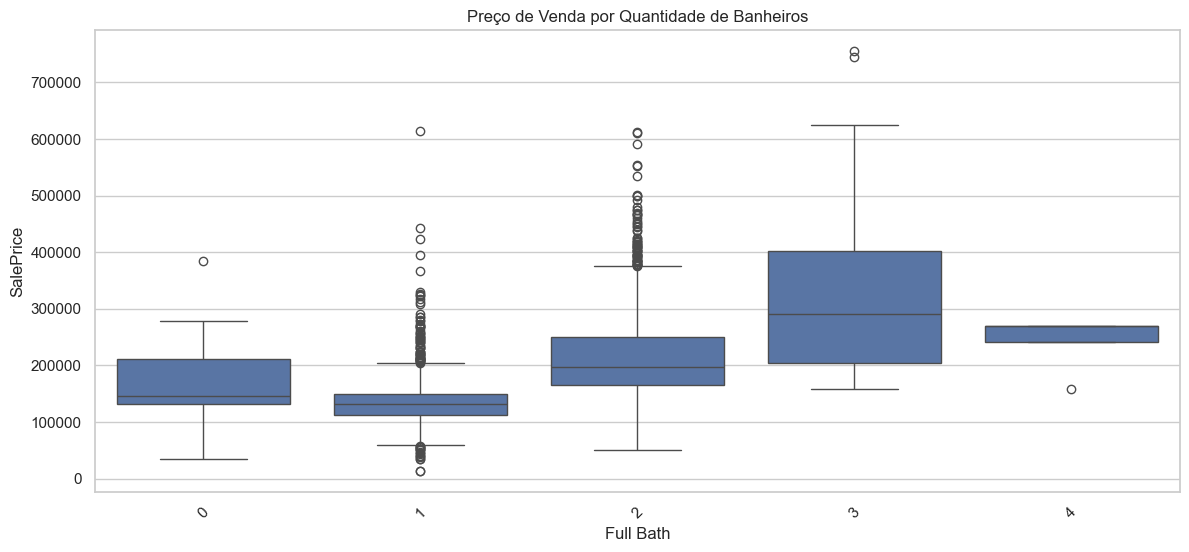

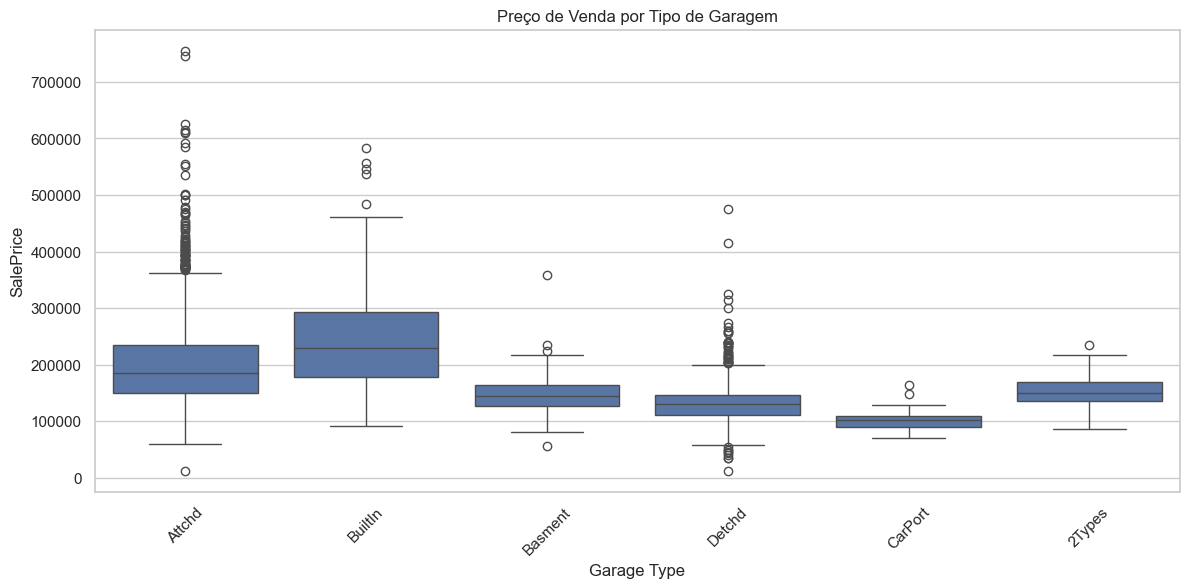

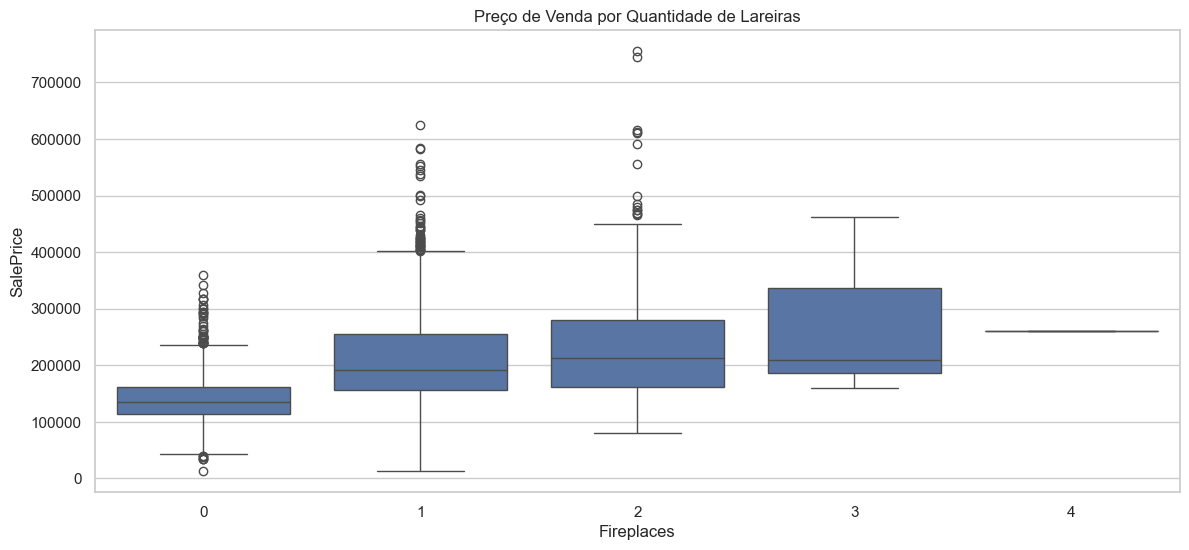

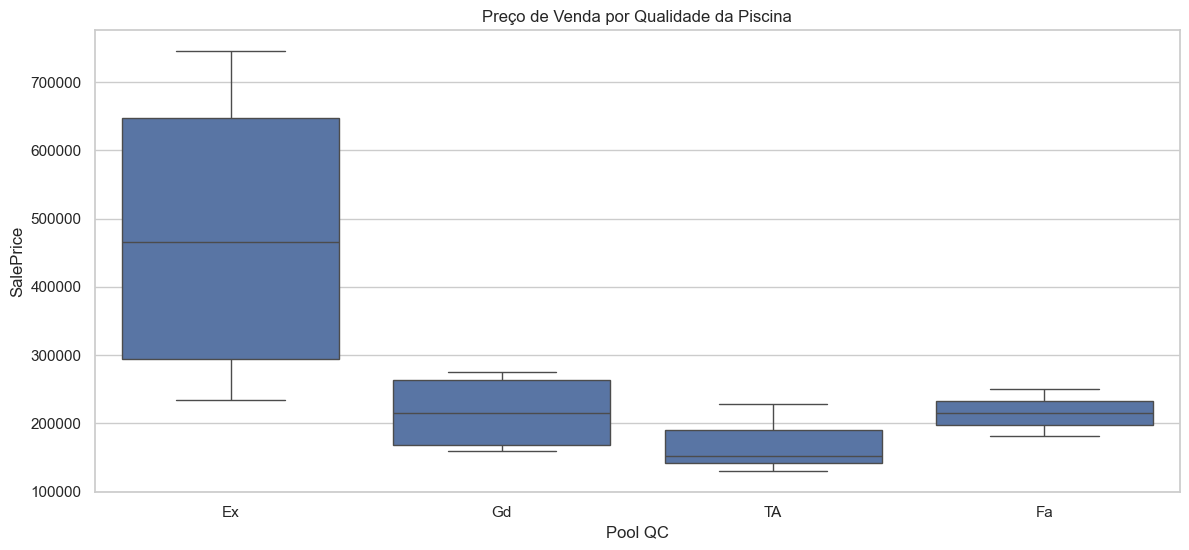

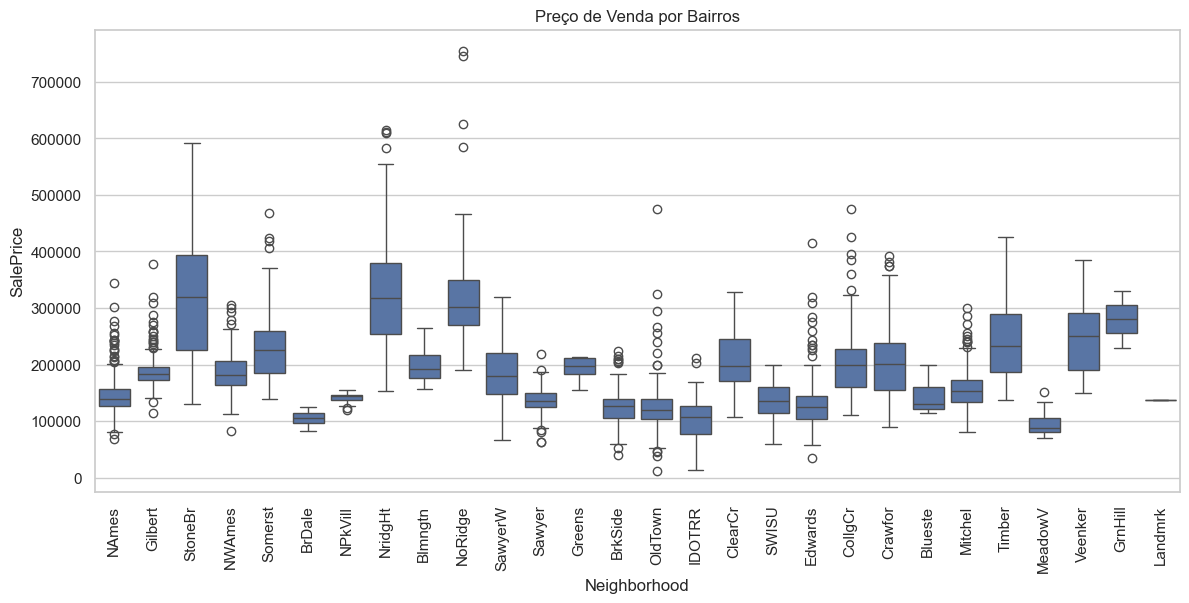

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar o estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico 1: Quantidade de Banheiros x Preço de venda
plt.figure(figsize=(14, 6))
sns.boxplot(x='Full Bath', y='SalePrice', data=df)  
plt.title('Preço de Venda por Quantidade de Banheiros')
plt.xticks(rotation=45)
plt.show()

# Gráfico 2: Tipo de garagem x Preço de venda
plt.figure(figsize=(14, 6))
sns.boxplot(x='Garage Type', y='SalePrice', data=df)  
plt.title('Preço de Venda por Tipo de Garagem')
plt.xticks(rotation=45)
plt.show()

# Gráfico 3: Quantidade de lareiras x Preço de venda
plt.figure(figsize=(14, 6))
sns.boxplot(x='Fireplaces', y='SalePrice', data=df)  
plt.title('Preço de Venda por Quantidade de Lareiras')
plt.show()

# Gráfico 4: Qualidade da piscina x Preço de venda
plt.figure(figsize=(14, 6))
sns.boxplot(x='Pool QC', y='SalePrice', data=df)  
plt.title('Preço de Venda por Qualidade da Piscina')
plt.show()

# Gráfico 5: Bairro x Preço de venda
plt.figure(figsize=(14, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)  
plt.title('Preço de Venda por Bairros')
plt.xticks(rotation=90)
plt.show()


Bairros como 'NoRidge', 'NridgHt' e 'StoneBr' destacam-se pelos preços mais elevados, evidenciando que a localização é um dos principais fatores de valorização de um imóvel. Além disso, características como número de banheiros (três ou mais) e lareiras têm um impacto significativo no aumento do preço. A qualidade da piscina e a presença de garagens práticas, como os tipos 'BuiltIn' e 'Attchd' (integradas ou anexas à casa), também contribuem para agregar valor ao imóvel.

Por outro lado, fatores que mais desvalorizam os imóveis incluem bairros como 'MeadowV', 'IDOTRR' e 'BrDale', conhecidos por preços mais baixos. Piscinas de qualidade 'TA' (Typical/Average), que além de terem pouco apelo estético ou funcional, podem gerar custos adicionais de manutenção, também impactam negativamente. Por fim, garagens do tipo 'Basement' e 'CarPort' (localizadas no porão ou simples coberturas) são menos atrativas e frequentemente associadas a preços mais baixos.

Agora irei aplicar a ANOVA para cada uma das características: 

In [32]:
from scipy.stats import f_oneway

groups_bedrooms = [df[df['Full Bath'] == value]['SalePrice'] for value in df['Full Bath'].unique()]
# ANOVA
anova_full_bath = f_oneway(*groups_bedrooms)
print(f"Full Bath - F-Statistic: {anova_full_bath.statistic}, p-value: {anova_full_bath.pvalue}")

groups_bedrooms = [df[df['Garage Type'] == value]['SalePrice'] for value in df['Garage Type'].unique()]
# ANOVA
anova_garage_type = f_oneway(*groups_bedrooms)
print(f"Garage Type - F-Statistic: {anova_garage_type.statistic}, p-value: {anova_garage_type.pvalue}")

groups_bedrooms = [df[df['Neighborhood'] == value]['SalePrice'] for value in df['Neighborhood'].unique()]
# ANOVA
anova_neighbourhood = f_oneway(*groups_bedrooms)
print(f"Neighborhood - F-Statistic: {anova_neighbourhood.statistic}, p-value: {anova_neighbourhood.pvalue}")

groups_bedrooms = [df[df['Fireplaces'] == value]['SalePrice'] for value in df['Fireplaces'].unique()]
# ANOVA
anova_fireplaces = f_oneway(*groups_bedrooms)
print(f"Fireplaces - F-Statistic: {anova_fireplaces.statistic}, p-value: {anova_fireplaces.pvalue}")

groups_bedrooms = [df[df['Pool QC'] == value]['SalePrice'] for value in df['Pool QC'].unique()]
# ANOVA
anova_pool_qc = f_oneway(*groups_bedrooms)
print(f"Pool QC - F-Statistic: {anova_pool_qc.statistic}, p-value: {anova_pool_qc.pvalue}")


Full Bath - F-Statistic: 332.5261408212701, p-value: 3.880472602547531e-236
Garage Type - F-Statistic: nan, p-value: nan
Neighborhood - F-Statistic: 144.3950774998116, p-value: 0.0
Fireplaces - F-Statistic: 232.3633215351391, p-value: 1.93686978907404e-173
Pool QC - F-Statistic: nan, p-value: nan


C:\Users\giova\AppData\Local\Temp\ipykernel_8196\123163856.py:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_garage_type = f_oneway(*groups_bedrooms)
C:\Users\giova\AppData\Local\Temp\ipykernel_8196\123163856.py:25: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_pool_qc = f_oneway(*groups_bedrooms)


O resultado acima mostra que existe uma diferença significativa nos preços médios das propriedades de acordo com a quantidade de banheiros, a presença de lareiras. Indica ainda que o vairro é a variável mais relevante para prever o preço. Algumas características como tipo de garagem (Garage Type) e qualidade da pscina (Pool QC) têm poucos ou nenhum dado, o que impede a realização da ANOVA tradicional. Para essas variáveis irei tentar utilizar Kruskal-Wallis.

O teste Kruskal-Wallis é uma alternativa não-paramétrica à ANOVA, especialmente útil quando os pressupostos de normalidade ou homogeneidade de variância são violados, ou quando temos amostras pequenas em algumas categorias. Ele compara as distribuições das amostras para verificar diferenças significativas.

In [34]:
from scipy.stats import kruskal

# Filtrar categorias válidas (pelo menos 2 amostras por categoria)
valid_garage_categories = df['Garage Type'].value_counts()[df['Garage Type'].value_counts() > 2].index

# Filtrar os dados apenas para essas categorias
data_filtered = df[df['Garage Type'].isin(valid_garage_categories)]

# Criar os grupos
groups_garage = [data_filtered[data_filtered['Garage Type'] == value]['SalePrice'] for value in valid_garage_categories]


In [35]:
# Filtrar categorias válidas (pelo menos 2 amostras por categoria)
valid_pool_categories = df['Pool QC'].value_counts()[df['Pool QC'].value_counts() > 2].index

# Filtrar os dados
data_filtered = df[df['Pool QC'].isin(valid_pool_categories)]

# Criar os grupos
groups_pool = [data_filtered[data_filtered['Pool QC'] == value]['SalePrice'] for value in valid_pool_categories]


In [37]:
kruskal_garage = kruskal(*groups_garage)
print(f"Kruskal-Wallis para GarageType - H-Statistic: {kruskal_garage.statistic}, p-value: {kruskal_garage.pvalue}")

kruskal_pool = kruskal(*groups_pool)
print(f"Kruskal-Wallis para PoolQC - H-Statistic: {kruskal_pool.statistic}, p-value: {kruskal_pool.pvalue}")

Kruskal-Wallis para GarageType - H-Statistic: 853.1073687639556, p-value: 3.740583103348876e-182
Kruskal-Wallis para PoolQC - H-Statistic: 6.393939393939391, p-value: 0.04088591315208003


A análise de Kruskal-Wallis nos informa que o tipo de garagem influencia fortemente o preço médio das propriedades, enquanto a influência da qualidade da piscina é menor.